#CURSO 2 - CIENCIA DE DADOS, APRENDIZADO DE MÁQUINA e DATA MINING
##PROFa. Roseli A F Romero


# Exercício 01
## Exploração e visualização de dados
 


## Dados unidimensionais
## Dados multidimensionais 

In [ ]:
# Permissão de leitura para o Drive
# Autorize o Collab a acessar seus arquivos no drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Considerando dados de duas cidades diferentes fornecendo as temperaturas máximas (celsius) durante diferente dias do ano.
Os dados foram disponibilizados nos arquivos "cidade_1.txt" e "cidade_2.txt".

As leituras estão em ordem cronológica, porém, o sensor da cidade 1 falhou em alguns dias. Nesses casos, a leitura foi substituida pelo o caracter "?".

### Questão 0
- Substitua os valores faltantes pela média das leituras do dia anterior e do dia seguinte.

In [6]:
import numpy as np
import pandas as pd

# leia o arquivo da cidade 1
with open("/content/cidade_1.txt") as f:
    cidade_1_lines = f.readlines()
for i in range(0,len(cidade_1_lines)):
  if cidade_1_lines[i] == "?\n":
    cidade_1_lines[i] = (float(cidade_1_lines[i-1])+float(cidade_1_lines[i+1]))/2
cidade_1 = np.array([float(x) for x in cidade_1_lines])

# lendo arquivo da cidade 2
with open("/content/cidade_2.txt") as f:
    cidade_2_lines = f.readlines()
cidade_2 = np.array([float(x) for x in cidade_2_lines])

### Questão 01. 
Consideramos um dia como quente caso sua temperatura máxima tenha sido maior ou igual 25 graus celsius.

1. Calcule a média de temperatura no ano para cada cidade.

2. Demonstre visualmente o porque essa métrica não é uma boa forma de estimarmos qual cidade teve mais dias quente.

   - Dica: Transforme os arrays de cada cidade em estruturas do tipo `DataFrame` da biblioteca **pandas** e utilize as funções de histograma e/ou boxplot.

Media cidade 1 igual a:  24.012638726623994
Media cidade 2 igual a:  27.82079587783114


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


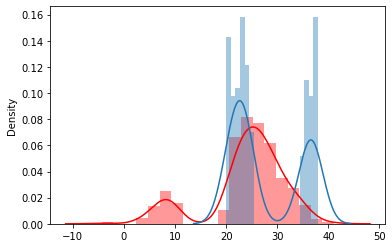

In [7]:
import seaborn as sns
from matplotlib import pyplot as plt
print('Media cidade 1 igual a: ', np.mean(cidade_1))
print('Media cidade 2 igual a: ', np.mean(cidade_2))

sns.distplot(cidade_1, bins=20, color="red")
sns.distplot(cidade_2, bins=20)

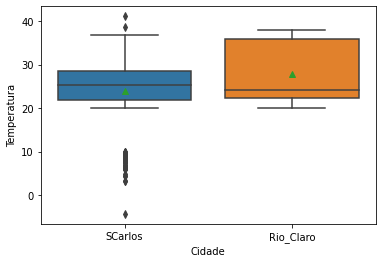

In [8]:
import pandas as pd
import numpy as np
cidades = pd.DataFrame({'Cidade': (['SCarlos']*len(cidade_1)) + (['Rio_Claro']*len(cidade_2)),
                        'Temperatura': np.concatenate([cidade_1, cidade_2])})
sns.boxplot(x='Cidade', y='Temperatura', data=cidades, showmeans=True)

Apesar da média da cidade 2 ser maior, percebemos que são apenas alguns outliers que puxam seu valor para cima. Pelo bloxplot, percebemos também que a cidade 1 teve uma variância menor do que a cidade 2. 



---

### Questão 02.
1. Calcule o número de dias quentes em cada cidade.
- Dica: Use a função `argwhere` da biblioteca **numpy**.

In [9]:
#Dias quentes cidade 1
dias_quentes_1 = np.argwhere(cidade_1>=25)
print("Numero de Dias quentes cidade 1:" , len(dias_quentes_1))

#Dias quentes cidade 2
dias_quentes_2 = np.argwhere(cidade_2>=25)
print("Numero de Dias quentes cidade 2:" , len(dias_quentes_2))


Numero de Dias quentes cidade 1: 192
Numero de Dias quentes cidade 2: 137


## Dados multidimensionais

Considere o conjunto de dados dos jogadores de futebol, que está no formato .csv.




In [10]:
players = pd.read_csv("/content/jogadores_exercicio1.csv")
players

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,age
0,530,167285,Alireza Haghighi,191589,1988-05-02 00:00:00,1.9304,79.832257,33
1,8608,184536,Philippe Coutinho,189242,1992-06-12 00:00:00,1.7018,68.038855,29
2,7752,38947,Mustapha Jarju Alasan,178374,1986-07-18 00:00:00,1.8288,81.193034,35
3,11073,36491,Zsolt Low,111191,1979-04-29 00:00:00,1.8034,69.853225,42
4,8427,27613,Paulinho,164256,1986-01-10 00:00:00,1.7526,72.121187,35
...,...,...,...,...,...,...,...,...
345,10199,7627,Thierno Bah,45269,1982-10-05 00:00:00,1.7526,68.038855,38
346,1216,246330,Benjamin Morel,202753,1987-06-10 00:00:00,1.8034,69.853225,34
347,4262,33793,Hugo Alcantara,14491,1979-07-28 00:00:00,1.9050,84.821773,42
348,5886,173699,Koro Kone,207538,1989-07-05 00:00:00,1.7780,74.842741,32




---


### Questão 03.

1. Calcule os quatro momentos (média, variância, obliquidade e achatamento) para cada atributo do tipo numerico (float) do conjunto.


In [11]:
#Média
media_altura = players['height'].mean()
media_peso = players['weight'].mean()
media_idade = players['age'].mean()
print("Média de altura é:", media_altura, "\n","Média de peso é:", media_peso, "\n","Média de idade é:", media_idade)
print("\n")

var_altura = players['height'].var()
var_peso = players['weight'].var()
var_idade = players['age'].var()
print("Variância de altura é:", var_altura, "\n","Variância de peso é:", var_peso, "\n","Variância de idade é:", var_idade)

print("\n")

obliq_altura = players['height'].skew()
obliq_peso = players['weight'].skew()
obliq_idade = players['age'].skew()
print("Obliquidade de altura é:", obliq_altura,"\n","Obliquidade de peso é:", obliq_peso,"\n","Obliquidade de idade é:", obliq_idade)

print("\n")

kurt_altura = players['height'].kurtosis()
kurt_peso = players['weight'].kurtosis()
kurt_idade = players['age'].kurtosis()
print("Achatamento de altura é:", kurt_altura,"\n","Achatamento de peso é:", kurt_peso, "\n","Achatamento de idade é:", kurt_idade)

Média de altura é: 1.8201639999999997 
 Média de peso é: 76.4549379308 
 Média de idade é: 34.30571428571429


Variância de altura é: 0.003668612683094556 
 Variância de peso é: 41.28153862517228 
 Variância de idade é: 26.46501023331969


Obliquidade de altura é: -0.12007981638318897 
 Obliquidade de peso é: 0.03027696608291131 
 Obliquidade de idade é: 0.2998913445412143


Achatamento de altura é: -0.4321787984728007 
 Achatamento de peso é: -0.10866518706788009 
 Achatamento de idade é: -0.3340241472353571




---

### Questão 04.

1. Gere o boxplot de atributo Height do conjunto, analise se os dados estão centrados (simetria) e estime os quartis deste atributo.  


Obliquidade: -0.11956457471844086
25 %: 1.778
50 %: 1.8288
75 %: 1.8542
Media:  1.8201639999999997
Mediana:  1.8288


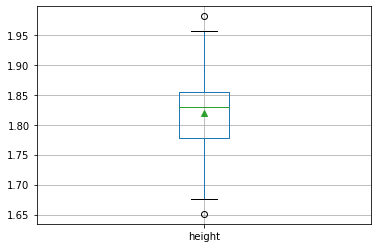

In [12]:
from scipy import stats
#Boxplot e análise da altura
boxplot_height = players.boxplot(column='height', showmeans=True)
print('Obliquidade: {}'.format(stats.skew(players.height)))

print('25 %:', players.height.quantile(0.25))
print('50 %:', players.height.quantile(0.5))
print('75 %:', players.height.quantile(0.75))

print('Media: ', players.height.mean())
print('Mediana: ', players.height.median())

Observamos uma sutil diferença entre a média e mediana, mostrando que os dados não estão perfeitamente centralizados mas sua obliquidade é desconsiderável.

Podemos confirmar calculando diretamente a obliquidade da distribuição, que teve resultado negativo porém perto de 0, indicando que a distribuição tem uma cauda à esquerda porém não muito significativa.


### Questão 05.
O arquivo **player_attributes.csv** contém mais informações sobre os jogadores. Leia-o como DataFrame e combine suas informações com o DataFrame já existente.

1. Caso um atributo não esteja disponível para algum jogador, substitua o valor NaN pela média ou valor mais comum para aquele atributo.

2. Calcule a moda de cada atributo após a combinação das bases. 

- Dica: Utilize a função [merge](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html) para combinar dois DataFrames que contém ao menos um atributo em comum

- Dica 2: Ambos DataFrames possuem o atributo "player_api_id"

In [13]:
players_attrs = pd.read_csv("/content/player_attributes1.csv")
# o parâmetro how poderia ter outros valores que também funcionam
jogadores = players.merge(players_attrs, how='right', on='player_api_id')

# Usando a moda ou média dependendo do tipo do atributo.
# Como o enunciado estava ambíguo, aceitei que usou só a moda
jogadores.apply(lambda x:x.fillna(
    x.mode()[0] if x.dtype == 'object' else x.mean(), axis=0, inplace=True))

for column in jogadores.columns:
  if 'id' not in column:
    print('Atributo: ', column, ' Resultado: ', jogadores[column].mode()[0])


Atributo:  player_name  Resultado:  Luan
Atributo:  birthday  Resultado:  1979-12-03 00:00:00
Atributo:  height  Resultado:  1.8288
Atributo:  weight  Resultado:  79.83225712000001
Atributo:  age  Resultado:  34
Atributo:  Unnamed: 0  Resultado:  451
Atributo:  date  Resultado:  2016-04-14 00:00:00
Atributo:  overall_rating  Resultado:  64.0
Atributo:  potential  Resultado:  66.0
Atributo:  preferred_foot  Resultado:  right
Atributo:  attacking_work_rate  Resultado:  medium
Atributo:  defensive_work_rate  Resultado:  medium
Atributo:  crossing  Resultado:  58.0
Atributo:  finishing  Resultado:  25.0
Atributo:  heading_accuracy  Resultado:  68.0
Atributo:  short_passing  Resultado:  64.0
Atributo:  volleys  Resultado:  47.80298507462687
Atributo:  dribbling  Resultado:  71.0
Atributo:  curve  Resultado:  51.080597014925374
Atributo:  free_kick_accuracy  Resultado:  58.0
Atributo:  long_passing  Resultado:  58.0
Atributo:  ball_control  Resultado:  62.0
Atributo:  acceleration  Resultado